### Imports
Warning: May run ten's of minutes (i.e. 10, 20 etc. up to an hour) on relatively fast machine. X-core + a lot of RAM required. Do not try VM

In [1]:
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
HTML("<style>.container { width:75% !important; }</style>")
# HTML("<style>div.cell.selected {border-left-width: 1px !important;}</style>")

In [2]:
%load_ext cython
%load_ext cythonmagic
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import scipy as sp

from scipy import * 

import re, reprlib, sys
import matplotlib.pyplot as plt
from itertools import *
import random as ran
from logging import *
from pprint import *
from time import *
import shlex, subprocess


from scipy.cluster.vq import *

import nltk as n
import nltk, nltk.classify.util, nltk.metrics, nltk.tokenize, nltk.stem
from nltk.corpus import *
from nltk.stem import *
from nltk.classify import *
from nltk.collocations import *
from nltk.metrics import *
from nltk.probability import *
from nltk.classify.scikitlearn import *
from nltk.tag.sequential import *
from nltk.tag import *
from nltk.tag.util import *
# n.download()

# from sklearn_pandas import *

import sklearn as sk
from sklearn import *
from sklearn.feature_extraction.text import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.pipeline import *
from sklearn.multiclass import *
from sklearn.datasets import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.feature_selection import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.grid_search import *
from sklearn.base import *
from sklearn.datasets.twenty_newsgroups import *
from sklearn.decomposition import *
from sklearn.feature_extraction import *
from sklearn.metrics import *
from sklearn.utils import *

sk.utils.check_random_state(5125)
ran.seed(5125)

/usr/local/lib/python3.4/dist-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


### Random functions
##### plot_roc_curve

In [3]:
def plot_roc_curve(test_class, y_score, name, trait):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    fpr, tpr, _ = roc_curve(test_class, y_score[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC chart with ' + name + " algorithm and on " + trait + " dataset")
    plt.legend(loc="lower right")
    plt.show()

##### train_test_at_once

In [4]:
columns_data2 = ["STATUS", "StringLength", 
          "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
          "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", 
          "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", 
          "SentimentNumeric"]

In [5]:
def train_test_at_once_pipes(pipes, trait_input, train_feat_trait, test_feat_trait, 
                             train_class_trait, test_class_trait, trait_X, trait_Y, skf_trait):
    
    pipes.fit(train_feat_trait[columns_data2], train_class_trait)
    y_pred_trait = pipes.predict(test_feat_trait[columns_data2])

    y_score_trait =  pipes.predict_proba(test_feat_trait[columns_data2])
    plot_roc_curve(test_class_trait, y_score_trait, "Pipeline", trait_input)
    
    print("\nFOR: Pipeline: ")
    print(sk.metrics.classification_report(test_class_trait, y_pred_trait, labels=[0, 1], target_names=["0", "1"]))
    print(sk.metrics.confusion_matrix(test_class_trait, y_pred_trait, labels=[0, 1]))
    print("F1: ", sk.metrics.f1_score(test_class_trait, y_pred_trait, labels=[0, 1], average='binary'))
    print("Precision: ", sk.metrics.average_precision_score(test_class_trait, y_pred_trait, average='micro'))
    print("Recall: ", sk.metrics.recall_score(test_class_trait, y_pred_trait, labels=[0, 1], average='binary'))

    scores = sk.cross_validation.cross_val_score(pipes, trait_X[columns_data2], trait_Y, cv=skf_trait, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, "pipeline"))
    print("Accuracy score: ", sk.metrics.accuracy_score(test_class_trait, y_pred_trait))

### R script adding new features to dataset 

In [6]:
# http://www.mango-solutions.com/wp/2015/10/integrating-python-and-r-part-ii-executing-r-from-python-and-vice-versa/
command = 'Rscript'
path2script = 'insert_features.R'

cmd = [command, path2script]

subprocess.check_output(cmd, universal_newlines=True)

''

In [7]:
data_n = pd.read_csv("../raw_data/data_n.csv", parse_dates=True, infer_datetime_format=True)
data_n.head(n=2)

,Unnamed: 0,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,...,Number_of_Dots,Number_of_Commas,Number_of_Semicolons,Number_of_Colons,Average_Word_Length,Lexical_Diversity,Number_of_FunctionalWords,Number_of_Pronouns,Number_of_PROPNAMEs,SentimentNumeric
0,1,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3,3.15,3.25,4.4,n,y,...,1,0,0,0,4.400,0.700,2,0,0,2
1,2,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3,3.15,3.25,4.4,n,y,...,1,0,0,0,3.615,0.577,10,1,0,0


### Replace 'y' and 'n'   AND easy split

In [8]:
# http://stackoverflow.com/a/17702781
d = {'n': 0, 'y': 1} # 1, y, = TRUE             0, n = FALSE
data_n = data_n.replace(d)
data_n.head(n=1)

,Unnamed: 0,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,...,Number_of_Dots,Number_of_Commas,Number_of_Semicolons,Number_of_Colons,Average_Word_Length,Lexical_Diversity,Number_of_FunctionalWords,Number_of_Pronouns,Number_of_PROPNAMEs,SentimentNumeric
0,1,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3,3.15,3.25,4.4,0,1,...,1,0,0,0,4.4,0.7,2,0,0,2


In [9]:
#norm:http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# to_drop = ['State','Area Code','Phone','Churn?']
# churn_feat_space = data_n.drop(to_drop,axis=1)

In [10]:
neu = data_n[["#AUTHID","STATUS","cNEU","StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
ext = data_n[["#AUTHID","STATUS","cEXT", "StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
agr = data_n[["#AUTHID","STATUS","cAGR","StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
con = data_n[["#AUTHID","STATUS","cCON","StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
opn = data_n[["#AUTHID","STATUS","cOPN", "StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]

### Split stratified k-folds

In [11]:
# neu = data_n[["#AUTHID","STATUS","cNEU"]]
# train_neu, test_neu, y_train, y_test = sk.cross_validation.train_test_split(neu, neu["cNEU"], train_size = 0.66, stratify= neu["cNEU"])
# train_neu, test_neu, y_train, y_test 

In [12]:
train_feat_neu, test_feat_neu, train_class_neu, test_class_neu = sk.cross_validation.train_test_split(neu, neu["cNEU"], train_size = 0.66, stratify = neu["cNEU"],random_state= 5152)
print(train_feat_neu.shape, test_feat_neu.shape,train_class_neu.shape ,test_class_neu.shape)

neu_X = train_feat_neu.append(test_feat_neu)
neu_Y = train_class_neu.append(test_class_neu)

train_feat_ext, test_feat_ext, train_class_ext, test_class_ext = sk.cross_validation.train_test_split(ext, ext["cEXT"], train_size = 0.66, stratify = ext["cEXT"],random_state= 5152)

ext_X = train_feat_ext.append(test_feat_ext)
ext_Y = train_class_ext.append(test_class_ext)

train_feat_agr, test_feat_agr, train_class_agr, test_class_agr = sk.cross_validation.train_test_split(agr, agr["cAGR"], train_size = 0.66, stratify = agr["cAGR"],random_state= 5152)

agr_X = train_feat_agr.append(test_feat_agr)
agr_Y = train_class_agr.append(test_class_agr)

train_feat_con, test_feat_con, train_class_con, test_class_con = sk.cross_validation.train_test_split(con, con["cCON"], train_size = 0.66, stratify = con["cCON"],random_state= 5152)

con_X = train_feat_con.append(test_feat_con)
con_Y = train_class_con.append(test_class_con)

train_feat_opn, test_feat_opn, train_class_opn, test_class_opn = sk.cross_validation.train_test_split(opn, opn["cOPN"], train_size = 0.66, stratify = opn["cOPN"],random_state= 5152)

opn_X = train_feat_opn.append(test_feat_opn)
opn_Y = train_class_opn.append(test_class_opn)

(6545, 15) (3372, 15) (6545,) (3372,)


In [13]:
test_class_ext.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/ext_test.csv",  header=None,  encoding="utf-8")
test_class_neu.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/neu_test.csv",  header=None,  encoding="utf-8")
test_class_agr.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/agr_test.csv",  header=None,  encoding="utf-8")
test_class_con.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/con_test.csv",  header=None,  encoding="utf-8")
test_class_opn.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/opn_test.csv",  header=None,  encoding="utf-8")

In [14]:
skf_neu = StratifiedKFold(neu["cNEU"], n_folds=10, shuffle=True, random_state = 5152)
skf_ext = StratifiedKFold(ext["cEXT"], n_folds=10, shuffle=True, random_state = 5152)
skf_agr = StratifiedKFold(agr["cAGR"], n_folds=10, shuffle=True, random_state = 5152)
skf_con = StratifiedKFold(con["cCON"], n_folds=10, shuffle=True, random_state = 5152)
skf_opn = StratifiedKFold(opn["cOPN"], n_folds=10, shuffle=True, random_state = 5152)

#### Pipeline for STATUS and the rest

In [16]:
%run ETL.py ### at least 2+1+2 grid search parameters

In [18]:
pipeline = Pipeline([     
    ('features', FeatureUnion(
          transformer_list=[
            ('ngram_tf_idf', Pipeline([
              ('selector', ColumnSelector()),
              ('counts', TfidfVectorizer(ngram_range = (1,2))),
            ])),

            ('rest', Pipeline([
              ('extract', ColumnExtractor()), 
              ('best', TruncatedSVD(n_components=9, random_state = 5152)),
            ])),   
          ],

          transformer_weights={
            'ngram_tf_idf': 1.0,
            'rest': 1.0,
          },
    )),
#     ('classifier', SVC(kernel ="linear", probability = True, random_state = 5152)),
        ("classifier", BernoulliNB()),
#       ('classifier', DecisionTreeClassifier(random_state = 5152)),
])

### Train + Test NEU

read: https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

#### Pipeline Neu

<IPython.core.display.Javascript object>


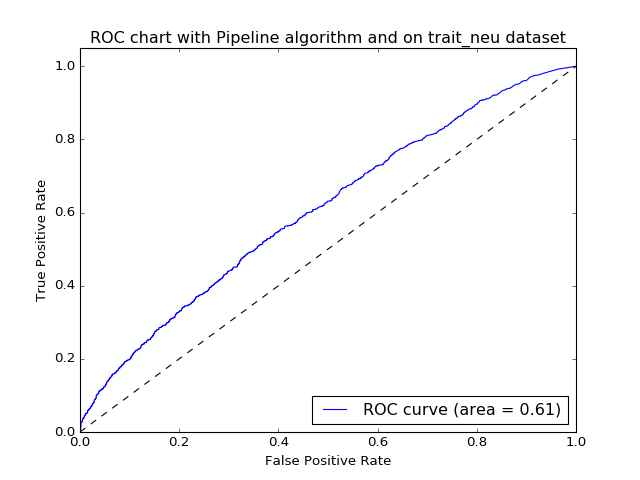


FOR: Pipeline: 
             precision    recall  f1-score   support

          0       0.63      1.00      0.77      2108
          1       0.85      0.02      0.04      1264

avg / total       0.71      0.63      0.50      3372

[[2104    4]
 [1241   23]]
F1:  0.0356312935709
Precision:  0.619039448307
Recall:  0.0181962025316
Accuracy: 0.630 (+/- 0.03) [pipeline]
Accuracy score:  0.630782918149


In [19]:
train_test_at_once_pipes(pipeline,"trait_neu", train_feat_neu, test_feat_neu, 
                   train_class_neu, test_class_neu, neu_X, neu_Y, skf_neu)

### Train + Test EXT

#### Pipeline Ext

<IPython.core.display.Javascript object>


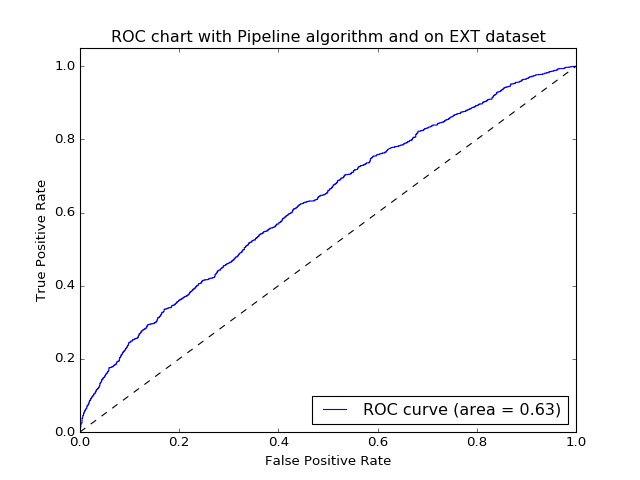


FOR: Pipeline: 
             precision    recall  f1-score   support

          0       0.59      0.98      0.74      1941
          1       0.75      0.09      0.17      1431

avg / total       0.66      0.60      0.50      3372

[[1895   46]
 [1296  135]]
F1:  0.167493796526
Precision:  0.612268806622
Recall:  0.0943396226415
Accuracy: 0.604 (+/- 0.04) [pipeline]
Accuracy score:  0.602016607355


In [20]:
train_test_at_once_pipes(pipeline,"EXT", train_feat_ext, test_feat_ext, 
                   train_class_ext, test_class_ext, ext_X, ext_Y, skf_ext)

<img  src="F368UBIM588O049IK98FUHCWO8UPXL8Y.png"/>

### Train + Test CON

#### Pipeline Con

<IPython.core.display.Javascript object>


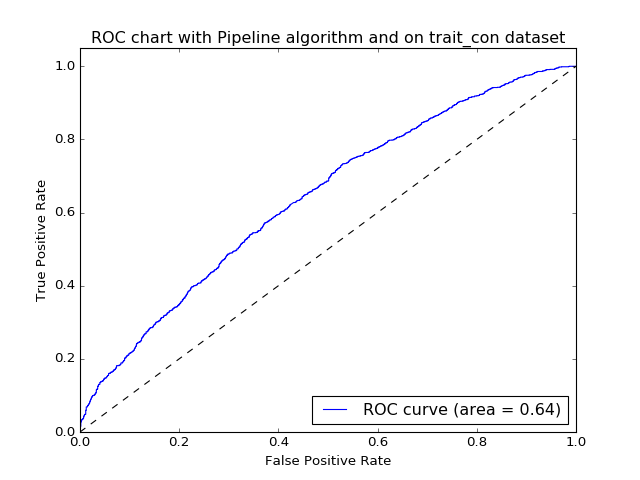


FOR: Pipeline: 
             precision    recall  f1-score   support

          0       0.57      0.89      0.70      1823
          1       0.64      0.22      0.33      1549

avg / total       0.60      0.58      0.53      3372

[[1630  193]
 [1209  340]]
F1:  0.326609029779
Precision:  0.607968030634
Recall:  0.219496449322
Accuracy: 0.603 (+/- 0.03) [pipeline]
Accuracy score:  0.584223013049


In [21]:
train_test_at_once_pipes(pipeline,"trait_con", train_feat_con, test_feat_con, 
                   train_class_con, test_class_con, con_X, con_Y, skf_con)

### Train + Test AGR

#### Pipeline Agr

<IPython.core.display.Javascript object>


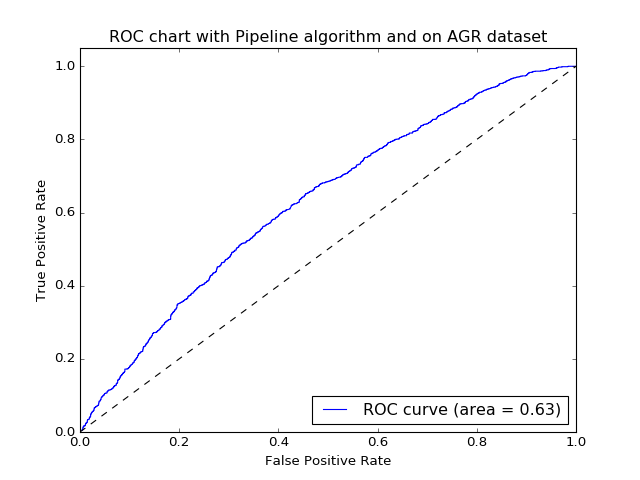


FOR: Pipeline: 
             precision    recall  f1-score   support

          0       0.68      0.22      0.33      1581
          1       0.57      0.91      0.70      1791

avg / total       0.62      0.58      0.52      3372

[[ 340 1241]
 [ 162 1629]]
F1:  0.698991632697
Precision:  0.762593131068
Recall:  0.909547738693
Accuracy: 0.583 (+/- 0.03) [pipeline]
Accuracy score:  0.583926453144


In [22]:
train_test_at_once_pipes(pipeline,"AGR", train_feat_agr, test_feat_agr, 
                   train_class_agr, test_class_agr, agr_X, agr_Y, skf_agr)

### Train + Test OPN

#### Pipeline Opn

<IPython.core.display.Javascript object>


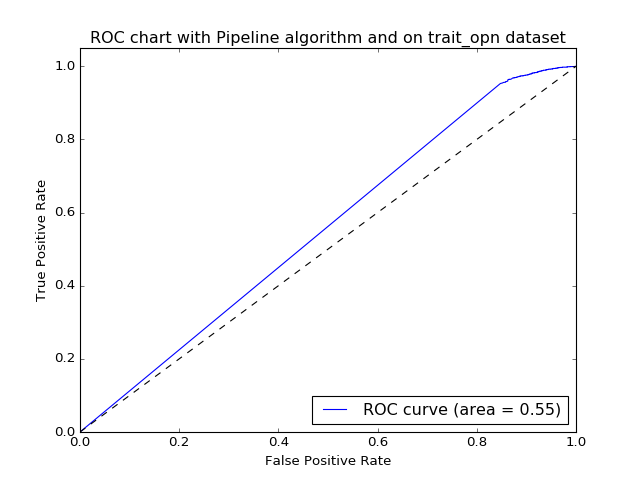


FOR: Pipeline: 
             precision    recall  f1-score   support

          0       0.82      0.02      0.03       866
          1       0.75      1.00      0.85      2506

avg / total       0.77      0.75      0.64      3372

[[  14  852]
 [   3 2503]]
F1:  0.85412045726
Precision:  0.87287161173
Recall:  0.998802873105
Accuracy: 0.747 (+/- 0.02) [pipeline]
Accuracy score:  0.746441281139


In [23]:
train_test_at_once_pipes(pipeline,"trait_opn", train_feat_opn, test_feat_opn, 
                   train_class_opn, test_class_opn, opn_X, opn_Y, skf_opn)